In [1]:
import os
import csv
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import pickle
import matplotlib.pyplot as plt

In [42]:
code_path = os.getcwd()
input_dir = os.path.join(code_path,'radarScenes_v5_Nmin')
print(input_dir)

/home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v5_Nmin


In [3]:
def csv_read():
  print("Reading directory:",input_dir)
  files = os.listdir(input_dir)
  files.sort(key=lambda x:x[:11])
  print('Training Sequence:',len(files))
  Nmin = []
  TrainX = []
  for filename in files:
    csv_path = os.path.join(input_dir,filename)
    with open(csv_path,newline='') as csv_file:
      rows = csv.reader(csv_file)
      first = True
      for row in rows:
        if first:
          first = False
          continue
        if str(row).find('nan') != -1 or str(row).find('inf') != -1:
          continue
        Nmin.append(int(row[3]))  # 2:iou>=0.3, 3:iou>=0.5
        input_row = []
        input_row.append(float(row[4])/int(row[11])) # vel slot 0
        input_row.append(float(row[5])/int(row[11])) # vel slot 1
        input_row.append(float(row[6])/int(row[11])) # vel slot 2
        input_row.append(float(row[7])/int(row[11])) # vel slot 3
        input_row.append(float(row[8])/int(row[11])) # vel slot 4
        input_row.append(float(row[9])/int(row[11])) # vel slot 5
        input_row.append(int(row[11])) # current scan num

        TrainX.append(input_row)
  NminMatrix = np.asarray(Nmin)
  NminMatrix.reshape(len(Nmin),1)
  # Nmin_min = np.min(NminMatrix)
  # Nmin_max = np.max(NminMatrix)
  # NminMatrix = (NminMatrix-Nmin_min)/(Nmin_max-Nmin_min)
  print('Target:',NminMatrix[0])
  print('Input:',TrainX[0])
  TrainMatrix = np.asarray(TrainX)
  X_train, X_test, Y_train, Y_test = model_selection.train_test_split(np.array(TrainMatrix), np.array(NminMatrix), test_size=0.2)
  print('Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.3')
  return X_train, X_test, Y_train, Y_test, TrainMatrix, NminMatrix

In [43]:
X_train, X_test, Y_train, Y_test, X_total, Y_total = csv_read()

Reading directory: /home/user/deng/catkin_deng/src/track/DBSCAN_Train/radarScenes_v5_Nmin
Training Sequence: 112
Target: 2
Input: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300]
Training Element: vel slot 0~5, current scan num; Training Target: Nmin in iou 0.3


In [5]:
def save_model(model,name):
    out_path = os.path.join(code_path,name+'.sav')
    pickle.dump(model,open(out_path,'wb'))

In [6]:
def evaluate_model(model,X_test,Y_test):
    predict_y_test = model.predict(X_test)
    print('Test Score: ',model.score(X_test,Y_test))
    print(Y_test)
    print(predict_y_test)

In [7]:
def load_model(name):
    load_path = os.path.join(code_path,name+'.sav')
    return pickle.load(open(load_path, 'rb'))

In [44]:
training_model_name = 'Nmin_ClassficationMLP_model_logistic_v2'

In [45]:
print('Training Net '+training_model_name+'!')
model = MLPClassifier(hidden_layer_sizes=200, max_iter=300, activation='logistic')
model.fit(X_total,Y_total)
save_model(model, training_model_name)

Training Net Nmin_ClassficationMLP_model_logistic_v2!


{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test Score:  0.4416940761588281
[4 4 2 ... 3 2 4]
[2 2 2 ... 2 2 4]


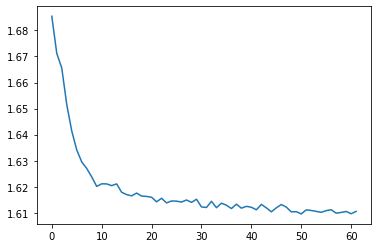

In [46]:
print(model.get_params())
evaluate_model(model,X_test,Y_test)
plt.plot(model.loss_curve_)

In [63]:
for i in range(100):
    model.partial_fit(X_train, Y_train)
    # print('End training iter',i)
    save_model(model,training_model_name)

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 200, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 300, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Test Score:  0.45051032518395445
[4 4 2 ... 3 2 4]
[2 2 2 ... 4 2 2]


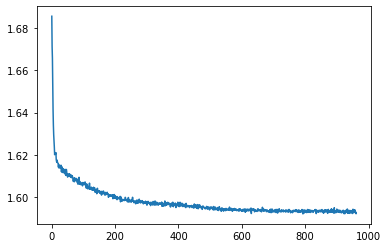

In [64]:
#v2 result
print(model.get_params())
evaluate_model(model,X_test,Y_test)
# print(model.predict_proba(X_test))
plt.plot(model.loss_curve_)

In [65]:
model.classes_

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [66]:
intercepts = np.array(model.intercepts_)
print(intercepts.shape)
print(repr(intercepts[0]))
print(repr(intercepts[1]))

(2,)
array([ 4.08948864,  2.34931964,  7.4974763 ,  4.66915367,  6.42586758,
       -5.78761468, -3.12288199, -0.65124794,  6.0720323 ,  5.29648395,
        5.90897407, -4.16195272,  3.95518405, -3.31032406,  4.11097442,
       -4.82284339, -3.94647748, -5.00026401,  5.78955614, -2.68410195,
        6.47921627, -3.42257019, -3.97265606, -3.32696641,  6.49518343,
       -0.19962353,  4.77833086, -4.94534912,  2.23952504, -0.15082921,
        5.75259554, -4.60205416, -5.12125972, -4.08516327, -4.13145167,
        6.93484813,  5.49440132,  5.80884014,  5.41063153,  4.73213944,
       -4.12777767, -2.5952295 ,  7.87386199,  5.67121718, -4.32977065,
       -2.87610556, -3.96150758, -3.42980787,  0.37498483,  7.15542904,
        4.5304689 , -4.61363089, -2.82165291,  0.90324595,  5.63070912,
        0.09170698, -4.34335558,  5.64647382, -4.38953128, -4.51517455,
        6.81315564,  6.60340197, -4.68436075, -5.89469793,  2.23275149,
       -4.94552288,  5.21364779,  6.69712533,  5.41496918, 

In [68]:
coef = np.array(model.coefs_)
print(coef[0].shape)
print(coef[1].shape)
# print(repr(coef[1]))
# print(model.coefs_)
for i in range(7):
    print("coef 0-",i)
    print(repr(coef[0][i]))
reshape_coef_1 = coef[1].transpose()
for i in range(9):
    print("coef 1-",i)
    print(repr(reshape_coef_1[i]))


(7, 200)
(200, 9)
coef 0- 0
array([-3.42490820e-03,  7.98160501e-03,  2.50341589e-04,  3.84819747e-04,
        1.63984754e-01, -2.33225528e-05, -1.00227376e-04, -3.12673702e-04,
       -4.88083135e-04, -5.53091045e-05, -7.79091160e-05, -1.22124781e-04,
        1.14170154e-02, -1.11272884e-04,  2.00580392e-02, -8.28202641e-04,
       -9.44724711e-05, -6.40856844e-04, -3.62858203e-04, -7.18213276e-04,
        1.22574968e-01, -9.75962961e-05, -9.23882681e-05, -1.19628508e-04,
        1.36838608e-01, -6.85720826e-03, -4.64776085e-02, -1.24639702e-04,
        2.85723543e-03,  1.98541174e-04, -1.23607688e-05, -1.31575697e-03,
       -9.30618306e-05, -1.09618972e-04, -1.13637619e-04, -2.40791521e-04,
       -2.68638648e+00, -7.21426028e-05,  1.17307197e-01,  1.37676925e-04,
       -1.05847527e-04, -5.93269575e-04,  3.09360583e-01,  1.35991438e-03,
       -7.18250494e+00, -1.67943638e-03, -1.48870606e-04, -1.19291307e-03,
        2.04847346e-05,  6.18622549e-01,  2.19098843e-02, -1.20085365e-0

In [ ]:
from sklearn.linear_model import LinearRegression
training_model_name_2 = 'Nmin_Linear_model_v1'
model2 = LinearRegression().fit(X_train, Y_train)
save_model(model2,training_model_name_2)

In [ ]:
print(model2.get_params())
evaluate_model(model2,X_test,Y_test)

In [ ]:
linear_coef = model2.coef_
print(repr(linear_coef))
print(repr(model2.intercept_))